In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.visualize import read_tensorboard_log, load_model
# exps = [f"experiments/80G_3ch_ampbcstep_M41_rho8_p{x/10:.1f}"  for x in range(11, 31)]
exps = [f"experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p{x/10:.1f}"  for x in range(11, 31)]
datas = {name:read_tensorboard_log(name) for name in exps}

In [2]:
datas['experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p1.1']['model'].rmps()

8086.8807658764545

In [9]:
path = 'experiments/80G_3ch_ampbc_M41_rho1'
info = read_tensorboard_log(path)
info['model'].rmps()

2794

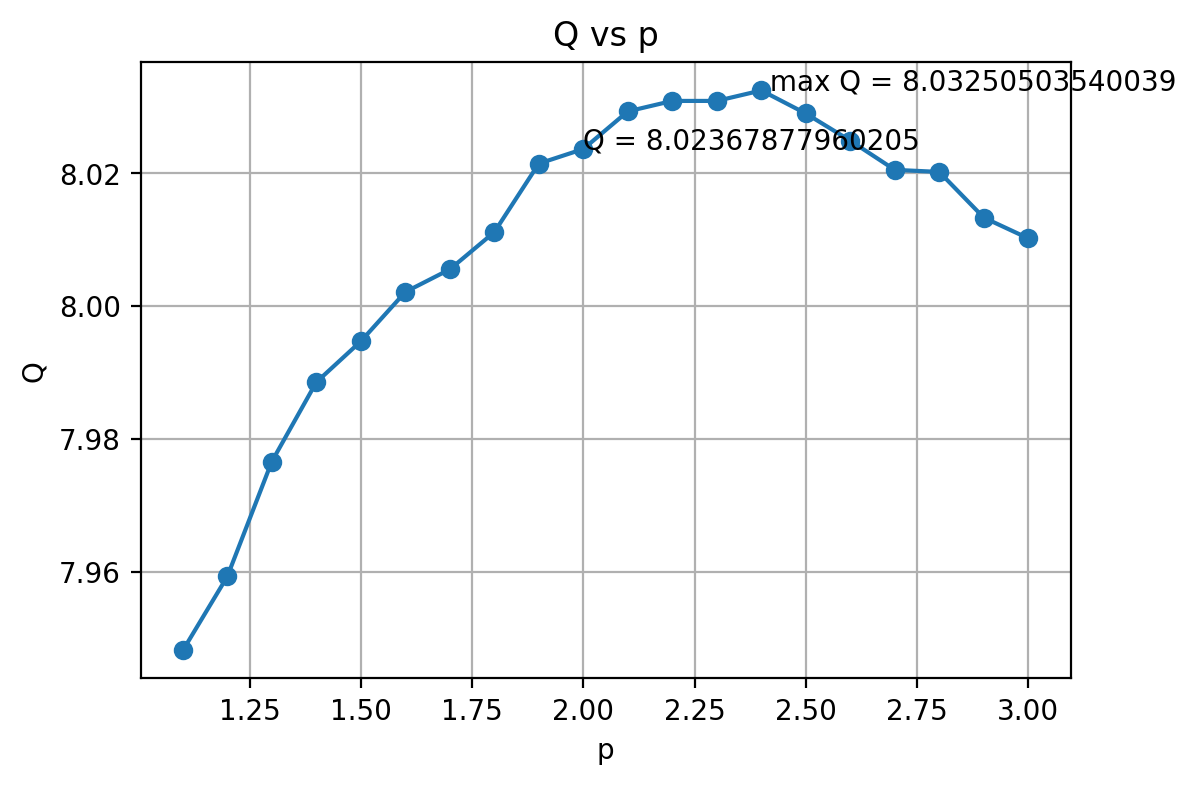

In [14]:
p = np.array([x/10  for x in range(11, 31)])
Q =  np.array([datas[key]['Metric/Qsq']['value'][-1] for key in exps])

plt.figure(dpi=200, figsize=(6, 4))
plt.plot(p, Q, '-o')
plt.xlabel('p')
plt.ylabel('Q')
plt.title('Q vs p')
plt.text(2, Q[p==2][0], f'Q = {Q[p==2][0]}')
plt.text(p[np.argmax(Q)], np.max(Q), f' max Q = {Q[np.argmax(Q)]}')
plt.grid()
plt.show()

In [50]:
import re

def find_max_number(file_list):
    # 使用正则表达式提取数字部分
    numbers = [int(re.search(r'(\d+)\.pth$', file).group(1)) for file in file_list]
    # 找到最大值
    max_number = max(numbers)
    return max_number

# 示例列表
file_list = ["123.pth", "456.pth", "789.pth", "42.pth"]

# 找到最大数字
max_number = find_max_number(file_list)
print(f"The maximum number is: {max_number}")


The maximum number is: 789
